In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.listdir('/content/drive/MyDrive/flowers'))

['dandelion', 'sunflower', 'rose', 'daisy', 'tulip']


# Importing Various Modules

In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

# Preparing the Data

## Counting the Images

In [4]:
def counting_images(folder_dir):
    img = []
    for images in os.listdir(folder_dir):
        # check if the image ends with png or jpg or jpeg
        if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
            img.append(images)
    return img
# get the path/directory
folder_dir = "/content/drive/MyDrive/flowers/daisy"
daisy_output = counting_images(folder_dir)
folder_dir = "/content/drive/MyDrive/flowers/dandelion"
dandelion_output = counting_images(folder_dir)
folder_dir = "/content/drive/MyDrive/flowers/rose"
rose_output = counting_images(folder_dir)
folder_dir = "/content/drive/MyDrive/flowers/sunflower"
sunflower_output = counting_images(folder_dir)
folder_dir = "/content/drive/MyDrive/flowers/tulip"
tulip_output = counting_images(folder_dir)

In [5]:
print("number of daisy samples = " , len(daisy_output))
print("daisy samples:")
print(daisy_output)

number of daisy samples =  764
daisy samples:
['10172379554_b296050f82_n.jpg', '14221848160_7f0a37c395.jpg', '1265350143_6e2b276ec9.jpg', '1306119996_ab8ae14d72_n.jpg', '1355787476_32e9f2a30b.jpg', '14087947408_9779257411_n.jpg', '14219214466_3ca6104eae_m.jpg', '11439894966_dca877f0cd.jpg', '10993818044_4c19b86c82.jpg', '10437929963_bc13eebe0c.jpg', '13826249325_f61cb15f86_n.jpg', '10555815624_dc211569b0.jpg', '1150395827_6f94a5c6e4_n.jpg', '10172636503_21bededa75_n.jpg', '1354396826_2868631432_m.jpg', '13583238844_573df2de8e_m.jpg', '12193032636_b50ae7db35_n.jpg', '10770585085_4742b9dac3_n.jpg', '10466290366_cc72e33532.jpg', '1342002397_9503c97b49.jpg', '1031799732_e7f4008c03.jpg', '11870378973_2ec1919f12.jpg', '14272874304_47c0a46f5a.jpg', '1299501272_59d9da5510_n.jpg', '11023272144_fce94401f2_m.jpg', '10466558316_a7198b87e2.jpg', '10994032453_ac7f8d9e2e.jpg', '14073784469_ffb12f3387_n.jpg', '10555749515_13a12a026e.jpg', '1374193928_a52320eafa.jpg', '1140299375_3aa7024466.jpg', '1014

In [6]:
print("number of dandelion samples = " , len(dandelion_output))
print("dandelion samples:")
print(dandelion_output)

number of dandelion samples =  1052
dandelion samples:
['15547944931_c1e095b185.jpg', '10043234166_e6dd915111_n.jpg', '19067907051_16d530c7d2.jpg', '17388697431_0d84c427d1_n.jpg', '17047385027_8fd510e164_n.jpg', '14283011_3e7452c5b2_n.jpg', '14021281124_89cc388eac_n.jpg', '138166590_47c6cb9dd0.jpg', '19617643201_9922eec796.jpg', '13946048982_4e6ec56987.jpg', '148180650_19a4b410db.jpg', '20983660733_06b35b9eb8.jpg', '14368895004_c486a29c1e_n.jpg', '12094442595_297494dba4_m.jpg', '13967344688_aa629dcdee_n.jpg', '19435491090_7af558e17e.jpg', '14053173516_a00150a919_m.jpg', '16656127943_2f70926b6c.jpg', '16650892835_9228a3ef67_m.jpg', '19586799286_beb9d684b5.jpg', '129019877_8eea2978ca_m.jpg', '10437652486_aa86c14985.jpg', '2019520447_48b2354a20_m.jpg', '18276105805_d31d3f7e71.jpg', '15381511376_fd743b7330_n.jpg', '16837594326_1056d875a4_m.jpg', '11124381625_24b17662bd_n.jpg', '14200639491_2a4611916d_n.jpg', '11595255065_d9550012fc.jpg', '14375349004_68d893254a_n.jpg', '2116997627_30fed84e

In [7]:
print("number of rose samples = " , len(rose_output))
print("rose samples:")
print(rose_output)

number of rose samples =  784
rose samples:
['12406418663_af20dc225f_n.jpg', '16525204061_9b47be3726_m.jpg', '15236835789_6009b8f33d.jpg', '19566556880_476c66c5ee_n.jpg', '14267691818_301aceda07.jpg', '16258946661_f9739cdc0a.jpg', '12572786553_634868f7f2_n.jpg', '17302463621_d82be11f01_n.jpg', '14870567200_80cda4362e_n.jpg', '14460517566_783dbf23b8_n.jpg', '15972976206_d32feeb79b_n.jpg', '14166797345_d2ab9da518.jpg', '15186434972_e353da940a.jpg', '118974357_0faa23cce9_n.jpg', '17869846573_d6c9c39843_n.jpg', '17104364030_ee31ee279b_n.jpg', '229488796_21ac6ee16d_n.jpg', '12407768513_3440238148_n.jpg', '13235124703_a7e1266e44.jpg', '17040847367_b54d05bf52.jpg', '17867791274_25bb3f8a41_n.jpg', '12240577184_b0de0e53ea_n.jpg', '17165596357_392a12391f.jpg', '15965652160_de91389965_m.jpg', '13943843842_36aae2e7f5_n.jpg', '16772483324_09f24813a1_n.jpg', '15681454551_b6f73ce443_n.jpg', '12323085443_8ac0cdb713_n.jpg', '2065522422_cfdd80044a_n.jpg', '16643785404_284c6c23fe_n.jpg', '12243069253_e51

In [8]:
print("number of sunflower samples = " , len(sunflower_output))
print("sunflower samples:")
print(sunflower_output)

number of sunflower samples =  733
sunflower samples:
['12471290635_1f9e3aae16_n.jpg', '1240625276_fb3bd0c7b1.jpg', '13568621944_d575324b8c_n.jpg', '12471791574_bb1be83df4.jpg', '1022552002_2b93faf9e7_n.jpg', '10541580714_ff6b171abd_n.jpg', '1064662314_c5a7891b9f_m.jpg', '10386522775_4f8c616999_m.jpg', '1244774242_25a20d99a9.jpg', '10862313945_e8ed9202d9_m.jpg', '12471441503_d188b5f31a_m.jpg', '1267876087_a1b3c63dc9.jpg', '12323859023_447387dbf0_n.jpg', '13117907313_86c99c6441.jpg', '13096076565_72c2c60875_n.jpg', '127192624_afa3d9cb84.jpg', '1044296388_912143e1d4.jpg', '10386525005_fd0b7d6c55_n.jpg', '13648603305_1268eda8b7_n.jpg', '1022552036_67d33d5bd8_n.jpg', '10386702973_e74a34c806_n.jpg', '1043442695_4556c4c13d_n.jpg', '10386503264_e05387e1f7_m.jpg', '1240626292_52cd5d7fb1_m.jpg', '13095941995_9a66faa713_n.jpg', '1240624822_4111dde542.jpg', '10386540106_1431e73086_m.jpg', '10386540696_0a95ee53a8_n.jpg', '1297092593_e573c0a3d6.jpg', '1314584013_fe935fdeb1_n.jpg', '1008566138_69276

In [9]:
print("number of tulip samples = " , len(tulip_output))
print("tulip samples:")
print(tulip_output)

number of tulip samples =  984
tulip samples:
['10094729603_eeca3f2cb6.jpg', '10128546863_8de70c610d.jpg', '10164073235_f29931d91e.jpg', '10995953955_089572caf0.jpg', '10686568196_b1915544a8.jpg', '10094731133_94a942463c.jpg', '107693873_86021ac4ea_n.jpg', '10791227_7168491604.jpg', '10163955604_ae0b830975_n.jpg', '100930342_92e8746431_n.jpg', '2399982682_16929d1f6d_n.jpg', '13923036338_1ce32c6d4f.jpg', '14241883744_ff69de8b7f_n.jpg', '20733335929_0100f38c4a_n.jpg', '2256214682_130c01d9d9.jpg', '13539404903_cd113e3e9b.jpg', '113902743_8f537f769b_n.jpg', '113291410_1bdc718ed8_n.jpg', '14090546015_504c8becd1.jpg', '2229804138_db9cba3443_n.jpg', '14866400927_3a59899df3_m.jpg', '14073608876_49db8ac97d_n.jpg', '19915714271_3d8d6a23a5_n.jpg', '14046760909_0c73e84a1f_n.jpg', '14238880561_7181ccb9fb_n.jpg', '14127532150_112823a8f6.jpg', '14087361621_9fefb8dbef.jpg', '142235017_07816937c6.jpg', '303858799_942b9c09e7_m.jpg', '19759207480_679167eacd_n.jpg', '13531001134_72052100e1_m.jpg', '196937

## Making the functions to get the training and validation set from the Images

In [10]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/flowers/rose'

In [11]:
def assign_label(img,flower_type):
    return flower_type

In [12]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [13]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:14<00:00, 53.88it/s] 

764


In [14]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:13<00:00, 53.53it/s] 

1497


In [15]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:23<00:00, 41.41it/s] 

2481


In [16]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:17<00:00, 59.40it/s] 

3533


In [17]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:15<00:00, 51.53it/s] 

4317


##  Visualizing some Random Images

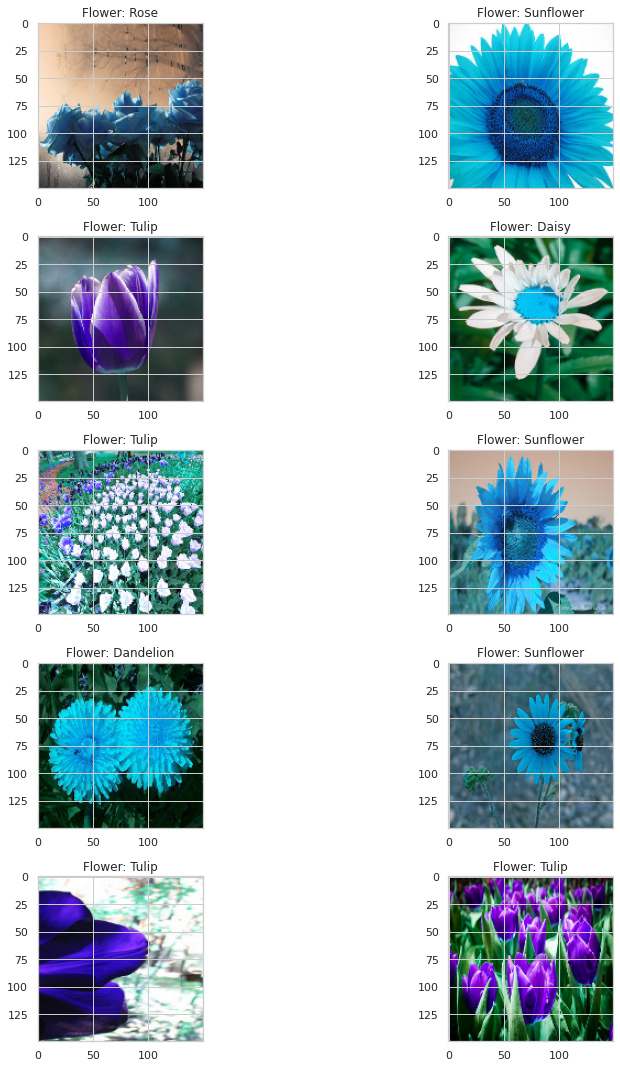

In [18]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

## Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [19]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

## Splitting into Training and Validation Sets

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## Setting the Random Seeds

In [21]:
#np.random.seed(42)
#rn.seed(42)
#tf.set_random_seed(42)

# Modelling

## Building the ConvNet Model

In [22]:
# # modelling starts using a CNN.

#defining model
model = Sequential()

#adding convolution layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
#adding pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#adding convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#adding pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
#adding convolution layer
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#adding pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#adding convolution layer
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#adding pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#adding fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

#adding fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

#adding output layer
model.add(Dense(5, activation = "softmax"))

## Using a LR Annealer

In [23]:
batch_size=32
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## Data Augmentation to prevent Overfitting

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

##  Compiling the Keras Model & Summary

In [25]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

## Fitting on the Training set and making predcitons on the Validation set

In [26]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/10
101/101 [==============================] - 26s 175ms/step - loss: 1.4126 - accuracy: 0.3769 - val_loss: 1.2997 - val_accuracy: 0.4537
Epoch 2/10
101/101 [==============================] - 17s 164ms/step - loss: 1.2096 - accuracy: 0.4640 - val_loss: 1.1133 - val_accuracy: 0.5361
Epoch 3/10
101/101 [==============================] - 17s 163ms/step - loss: 1.0867 - accuracy: 0.5485 - val_loss: 1.0104 - val_accuracy: 0.5759
Epoch 4/10
101/101 [==============================] - 16s 164ms/step - loss: 1.0223 - accuracy: 0.5891 - val_loss: 1.0119 - val_accuracy: 0.6333
Epoch 5/10
101/101 [==============================] - 17s 163ms/step - loss: 0.9350 - accuracy: 0.6393 - val_loss: 0.8518 - val_accuracy: 0.6843
Epoch 6/10
101/101 [==============================] - 16s 162ms/step - loss: 0.9051 - accuracy: 0.6452 - val_loss: 0.8217 - val_accuracy: 0.6972
Epoch 7/10
101/101 [==============================] - 16s 162ms/step - loss: 0.8698 - accuracy: 0.6593 - val_loss: 0.8041 - val_ac

# Evaluating the Model Performance

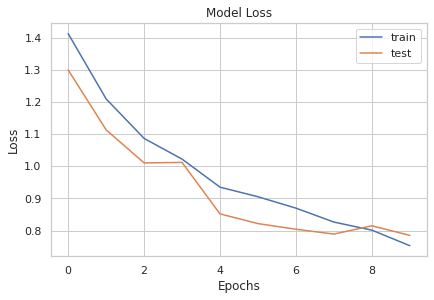

In [27]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

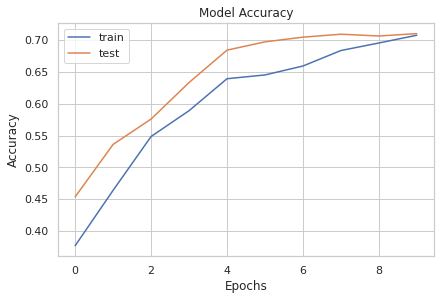

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Visualizing Predictons on the Validation Set

In [29]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 1s 12ms/step


In [30]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

## CORRECTLY CLASSIFIED FLOWER IMAGES



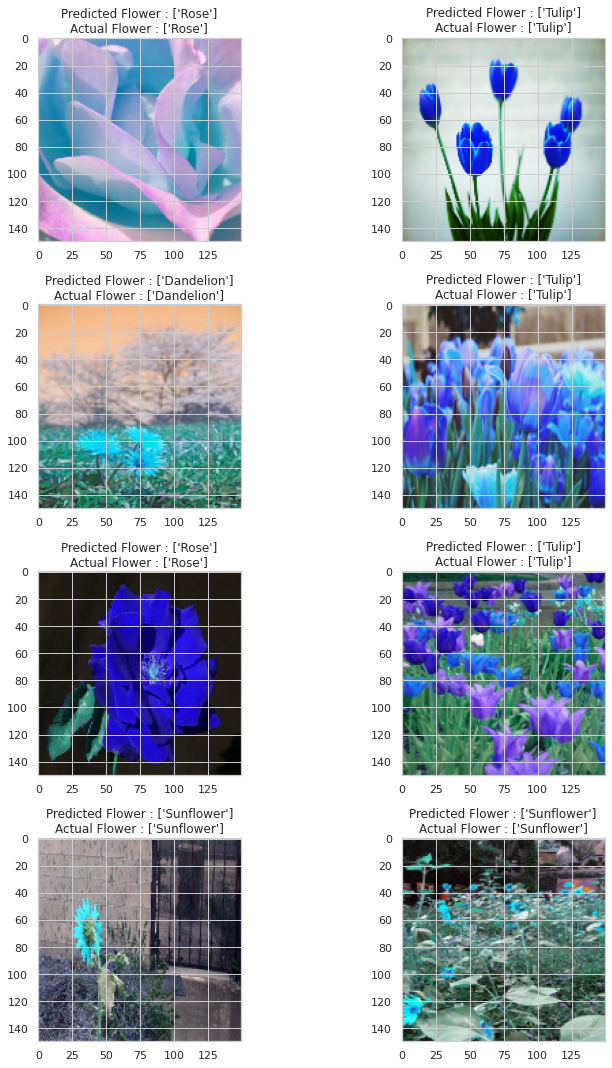

In [31]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]).reshape(-1,1))))
        plt.tight_layout()
        count+=1

## MISCLASSIFIED IMAGES OF FLOWERS


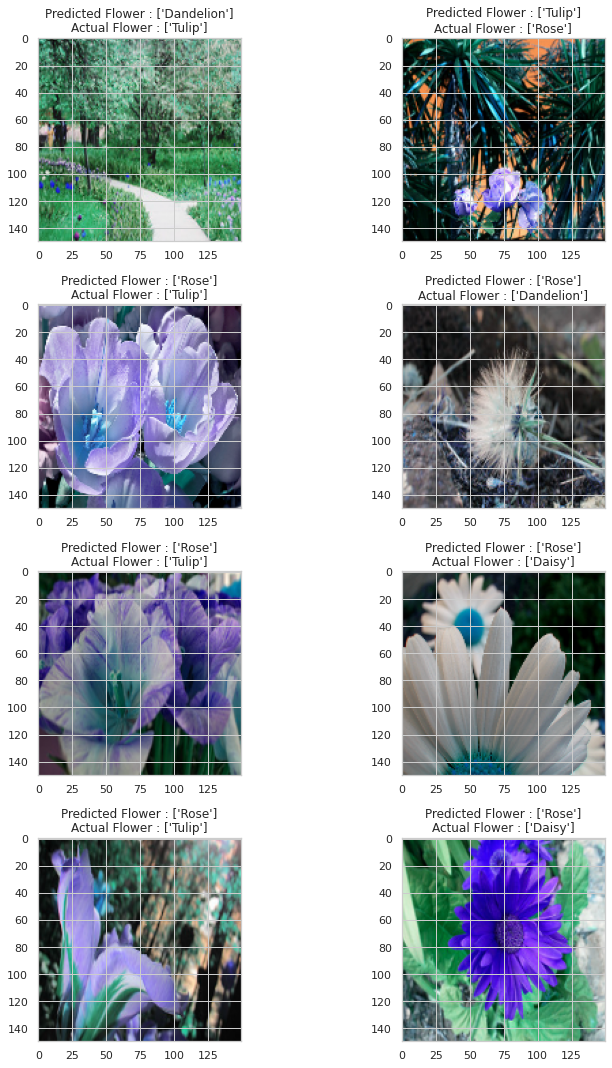

In [32]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "
        +str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]).reshape(-1,1))))
        plt.tight_layout()
        count+=1

# VGG 19

---



In [33]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 64
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [34]:
data = get_data("/content/drive/MyDrive/flowers")

In [35]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

## We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].

In [36]:
# Normalize the data
x = np.array(x) / 255

In [37]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [38]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [40]:
del x,y,data

In [41]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [42]:
from keras.models import Model
from keras.layers import MaxPool2D
from sklearn.metrics import classification_report
from keras.applications import VGG19
import random
with strategy.scope():
    pre_trained_model = VGG19(input_shape=(64,64,3), include_top=False, weights="imagenet")

    for layer in pre_trained_model.layers[:19]:
        layer.trainable = False

    model = Sequential([
        pre_trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])
    model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()
model.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 512)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 20,026,949
Trainable params: 4,722,181
Non-trainable params: 15,304,768
_________________________________________________________________
Model: "sequential_1"
_____________

In [43]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [44]:
history = model.fit(x_train,y_train, batch_size = 64 , epochs = 12 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/12
51/51 [==============================] - 6s 84ms/step - loss: 1.0994 - accuracy: 0.5944 - val_loss: 0.7763 - val_accuracy: 0.7028 - lr: 0.0010
Epoch 2/12
51/51 [==============================] - 3s 51ms/step - loss: 0.6586 - accuracy: 0.7510 - val_loss: 0.6481 - val_accuracy: 0.7722 - lr: 0.0010
Epoch 3/12
51/51 [==============================] - 3s 52ms/step - loss: 0.5061 - accuracy: 0.8066 - val_loss: 0.6252 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 4/12
51/51 [==============================] - 3s 51ms/step - loss: 0.3975 - accuracy: 0.8502 - val_loss: 0.7337 - val_accuracy: 0.7537 - lr: 0.0010
Epoch 5/12
51/51 [==============================] - ETA: 0s - loss: 0.2920 - accuracy: 0.8913
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
51/51 [==============================] - 3s 51ms/step - loss: 0.2920 - accuracy: 0.8913 - val_loss: 0.7495 - val_accuracy: 0.7704 - lr: 0.0010
Epoch 6/12
51/51 [==============================] - 3s 51ms/step - loss

In [45]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

34/34 [==============================] - 2s 34ms/step - loss: 0.8579 - accuracy: 0.7954
Loss of the model is -  0.8578794002532959
34/34 [==============================] - 1s 20ms/step - loss: 0.8579 - accuracy: 0.7954
Accuracy of the model is -  79.53703999519348 %


# Analysis after Model Training

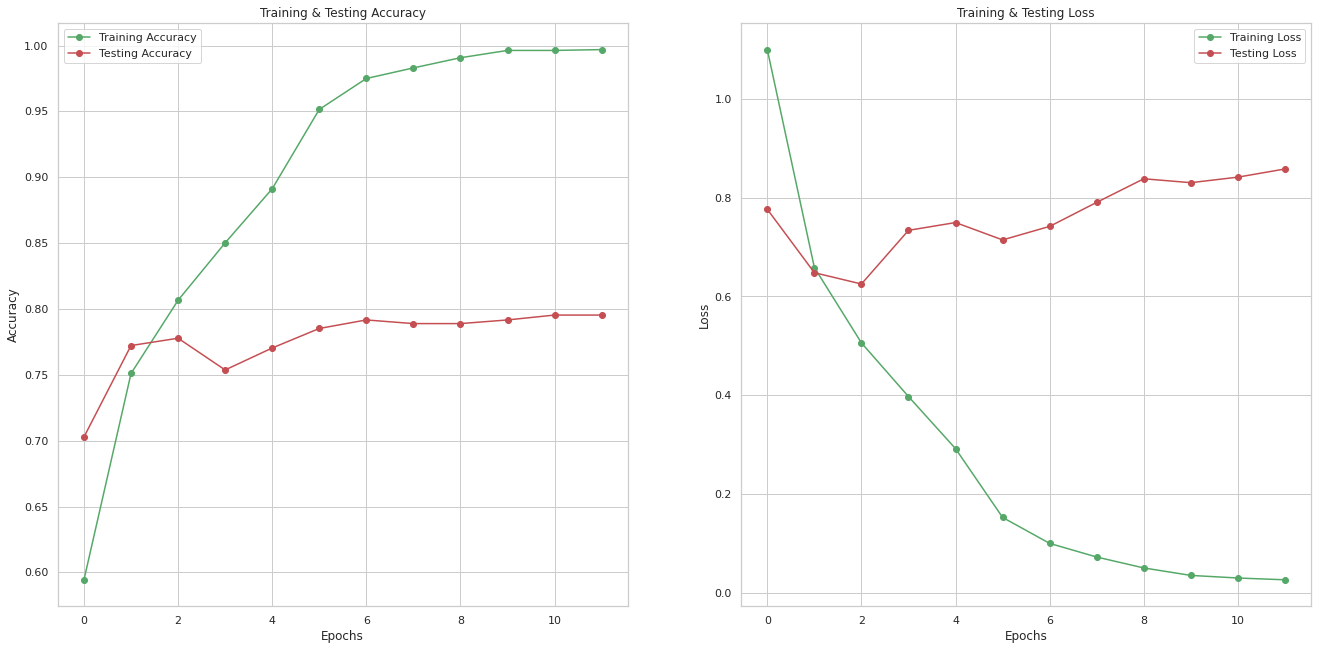

In [46]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [47]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 1s 19ms/step


In [48]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [49]:
print(classification_report(y_test_inv, pred_digits, target_names = labels))

              precision    recall  f1-score   support

   dandelion       0.85      0.84      0.85       279
       daisy       0.75      0.76      0.76       208
       tulip       0.81      0.77      0.79       245
   sunflower       0.81      0.84      0.82       160
        rose       0.72      0.77      0.74       188

    accuracy                           0.80      1080
   macro avg       0.79      0.79      0.79      1080
weighted avg       0.80      0.80      0.80      1080



In [50]:
cm = confusion_matrix(y_test_inv,pred_digits)
cm

array([[234,  24,   4,  12,   5],
       [ 22, 158,   9,   7,  12],
       [  3,  10, 189,  10,  33],
       [  7,   8,   6, 134,   5],
       [  8,  10,  24,   2, 144]])

In [51]:
cm = pd.DataFrame(cm , index = labels , columns = labels)

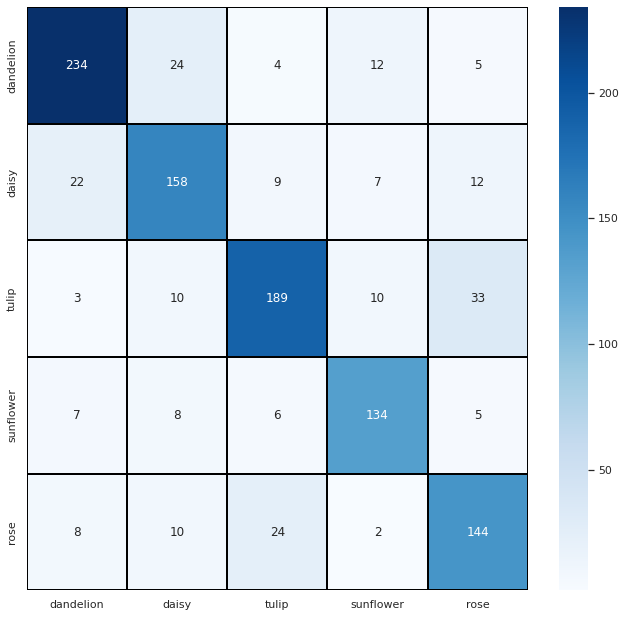

In [52]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

In [53]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

# CORRECTLY CLASSIFIED FLOWER IMAGES

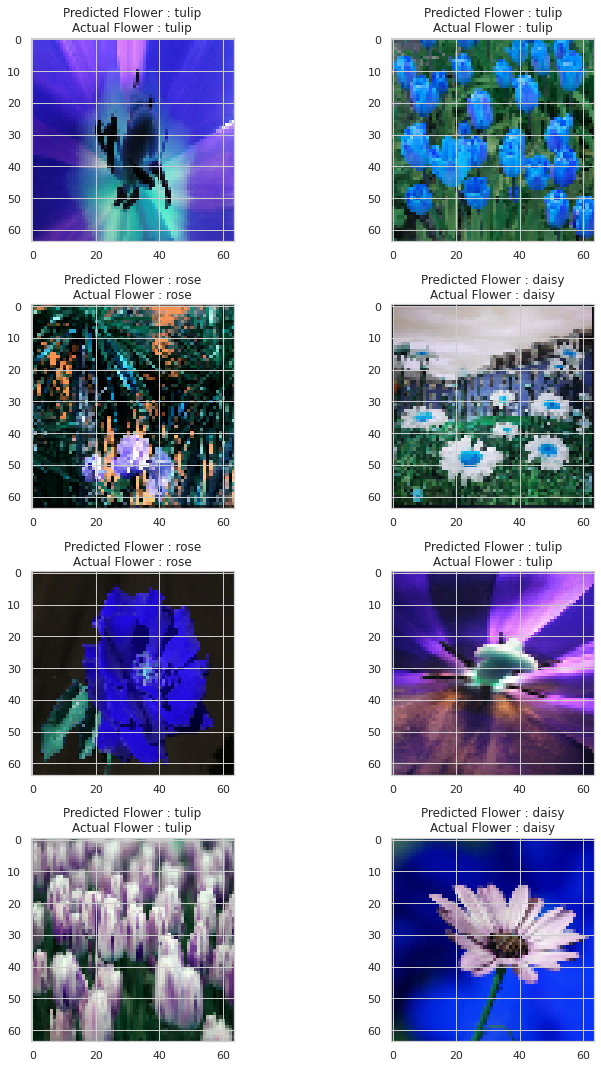

In [54]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ labels[pred_digits[prop_class[count]]] +"\n"+"Actual Flower : "+ labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count+=1

# INCORRECTLY CLASSIFIED FLOWER IMAGES

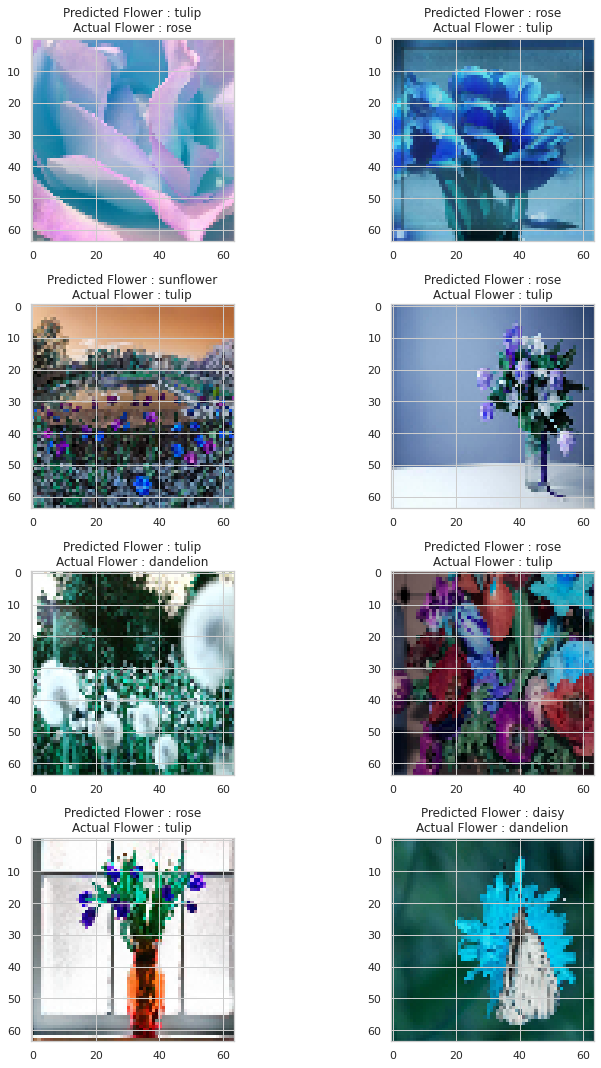

In [55]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+labels[pred_digits[mis_class[count]]]+"\n"+"Actual Flower : "+labels[y_test_inv[mis_class[count]]])
        plt.tight_layout()
        count+=1

# Transfer Learning

---



In [56]:
from keras.applications import VGG16
from keras.callbacks import ReduceLROnPlateau

# Preparing Base model

In [58]:
Base_model = VGG16(include_top= False, weights='imagenet',input_shape=(64,64,3), pooling='avg')
Base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

# Add own fully connected Layers

In [59]:
model = Sequential()

model.add(Base_model)
model.add(Dense(256,activation='relu'))
# adding prediction(softmax) layer
model.add(Dense(5,activation="softmax"))

In [60]:
# freeze layers(Base Model)
Base_model.trainable = False

In [61]:
# Set a learning rate annealer

red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

# Data augmentation to prevent Overfitting

In [63]:
datagen = ImageDataGenerator(featurewise_center= False,
                              samplewise_center= False,
                              featurewise_std_normalization= False,
                              samplewise_std_normalization=False,
                              rotation_range= 10,        # 0- 180
                              zca_whitening=False,
                              zoom_range=0.1,            # Randomly zoom image
                              width_shift_range=0.2,     # randomly shift images horizontally (fraction of total width)
                              height_shift_range=0.2,    # randomly shift images vertically (fraction of total height)
                              horizontal_flip=True,      # randomly flip images
                              vertical_flip=False)       # randomly flip images
                             
datagen.fit(x_train)

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 14,847,301
Trainable params: 132,613
Non-trainable params: 14,714,688
_________________________________________________________________


# Compile and train the model

In [65]:
model.compile(optimizer=Adam(lr = 1e-4), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [68]:
batch_size=64
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 10, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
50/50 [==============================] - 13s 229ms/step - loss: 1.5436 - accuracy: 0.3435 - val_loss: 1.4209 - val_accuracy: 0.4657
Epoch 2/10
50/50 [==============================] - 7s 146ms/step - loss: 1.3486 - accuracy: 0.5115 - val_loss: 1.2613 - val_accuracy: 0.5713
Epoch 3/10
50/50 [==============================] - 5s 101ms/step - loss: 1.2207 - accuracy: 0.5766 - val_loss: 1.1592 - val_accuracy: 0.6139
Epoch 4/10
50/50 [==============================] - 5s 104ms/step - loss: 1.1291 - accuracy: 0.6070 - val_loss: 1.0699 - val_accuracy: 0.6269
Epoch 5/10
50/50 [==============================] - 5s 106ms/step - loss: 1.0563 - accuracy: 0.6344 - val_loss: 1.0053 - val_accuracy: 0.6417
Epoch 6/10
50/50 [==============================] - 5s 106ms/step - loss: 1.0070 - accuracy: 0.6436 - val_loss: 0.9607 - val_accuracy: 0.6556
Epoch 7/10
50/50 [==============================] - 5s 98ms/step - loss: 0.9659 - accuracy: 0.6628 - val_loss: 0.9344 - val_accuracy: 0.6611
Epoch 

# Model Accuracy

Text(0, 0.5, 'Accuracy')

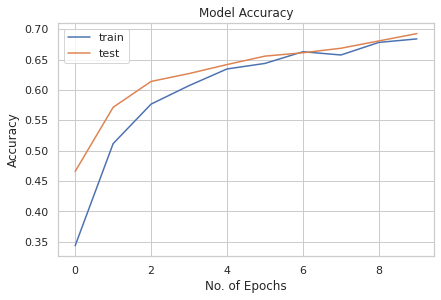

In [69]:
plt.plot(History.epoch, History.history['accuracy'])
plt.plot(History.epoch, History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train', 'test'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

# Model Loss

Text(0, 0.5, 'Loss')

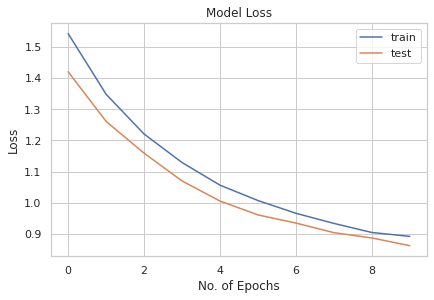

In [70]:
plt.plot(History.epoch, History.history['loss'])
plt.plot(History.epoch, History.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train', 'test'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

In [71]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 1s 18ms/step


In [72]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv)):
    if(y_test_inv[i] == pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv)):
    if(y_test_inv[i] != pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

# classified

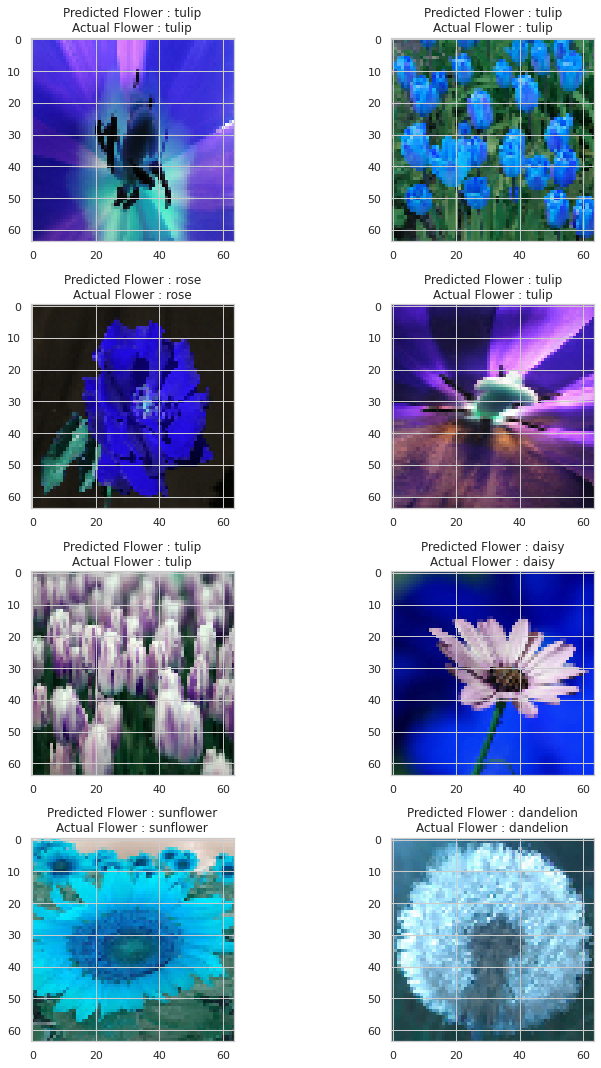

In [73]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ labels[pred_digits[prop_class[count]]] +"\n"+"Actual Flower : "+ labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count+=1

# Missclassified

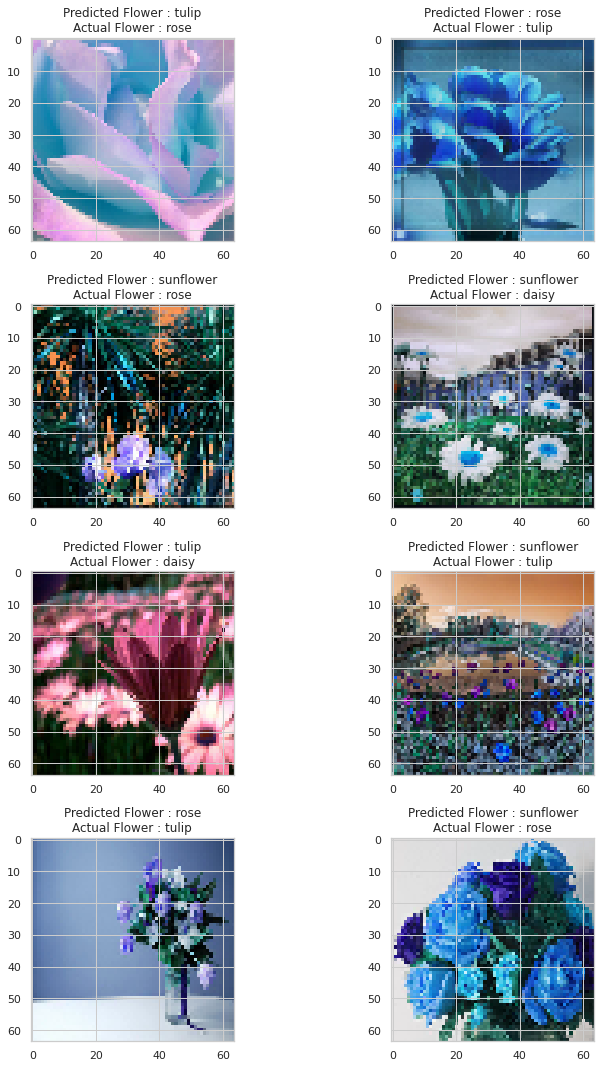

In [74]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+labels[pred_digits[mis_class[count]]]+"\n"+"Actual Flower : "+labels[y_test_inv[mis_class[count]]])
        plt.tight_layout()
        count+=1